# Demo No. 3 - Surface geometry

This demo will guide you trough building of the complete model of component's surfaces and it will demonstrate how to access the basic parameters of stellar surfaces. As usual, we will start with defining the binary system:

In [8]:
%matplotlib notebook
from astropy import units as u

from elisa import BinarySystem
from elisa import Star
from elisa.binary_system.container import OrbitalPositionContainer


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=10,  # angular size (in degrees) of the surface elements, default value is 3
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-04-07 09:48:14,407 - 6727 - binary_system.system - INFO: initialising object BinarySystem
2021-04-07 09:48:14,435 - 6727 - binary_system.system - INFO: setting discretization factor of secondary component to 12.00 according to discretization factor of the primary component.


Now we want to investigate surface geometry of the binary system `bs` at the following photometric phase:

In [9]:
phase = 0.2

Lets then calculate orbital position for such photometric phase (see Demo No. 2):

In [10]:
position = bs.calculate_orbital_motion(phase)[0]  # [0] at the end due to the fact that this function always returns list of positions
position

Position(idx=0.0, distance=1.0496298780877449, azimuth=3.024214951767732, true_anomaly=2.0119239856110207, phase=0.2)

Surface geometry of components is being calculated and stored in separate containers for each orbital position. Therefore we will now initialize the container where we will store our surface geometry:

In [11]:
orbital_position_container = OrbitalPositionContainer.from_binary_system(bs, position)

Once the container is initilized, we can build the surface using following command:

In [12]:
orbital_position_container.build()

Orbital position container can be also initialized more easily using function `build_container` which will construct a fully built container at given photometric `phase` or `time`: 

In [14]:
orbital_position_container = bs.build_container(phase=phase)

## Accessing the surface data

Binary system and its components are now fully constructed and stored in `orbital_position_container`. Now we can access parameters describing the system and its components at given orbital position. Surface parameters for each components can be accessed for each component using attributes `primary` or `secondary` which are itself instances od `StarContainer` that manages stellar surface models. 

We can start with surface points which we can access using following command:

In [7]:
orbital_position_container.secondary.points

array([[ 8.46677935e-01,  0.00000000e+00,  1.24272224e-17],
       [ 1.25148442e+00,  2.47200517e-17,  1.23600259e-17],
       [ 8.55384070e-01,  5.70357154e-02,  1.23962610e-17],
       [ 8.80356783e-01,  1.08785213e-01,  1.23208846e-17],
       [ 9.18753041e-01,  1.51039921e-01,  1.22375561e-17],
       [ 9.67022651e-01,  1.80884595e-01,  1.21763384e-17],
       [ 1.02138837e+00,  1.96423970e-01,  1.21511808e-17],
       [ 1.07789732e+00,  1.96604342e-01,  1.21623390e-17],
       [ 1.13240650e+00,  1.81255523e-01,  1.22013076e-17],
       [ 1.18069076e+00,  1.51252317e-01,  1.22547648e-17],
       [ 1.21872107e+00,  1.08668312e-01,  1.23076445e-17],
       [ 1.24308860e+00,  5.68046063e-02,  1.23460313e-17],
       [ 1.01064947e+00,  3.89804120e-02,  1.88629705e-01],
       [ 1.04962988e+00,  5.51239051e-02,  1.88620390e-01],
       [ 1.08865598e+00,  3.90261016e-02,  1.88850801e-01],
       [ 9.48180818e-01,  4.88552923e-02,  1.62504881e-01],
       [ 9.79585638e-01,  8.78326992e-02

which returns n x 3 numpy array of surface points in SMA units in cartesian coordinates placed in corotating cartesian reference frame centered on the primary component, with x-axis intersecting centre of the secondary component. Surface points mesh can be also visualized using following function:

<IPython.core.display.Javascript object>


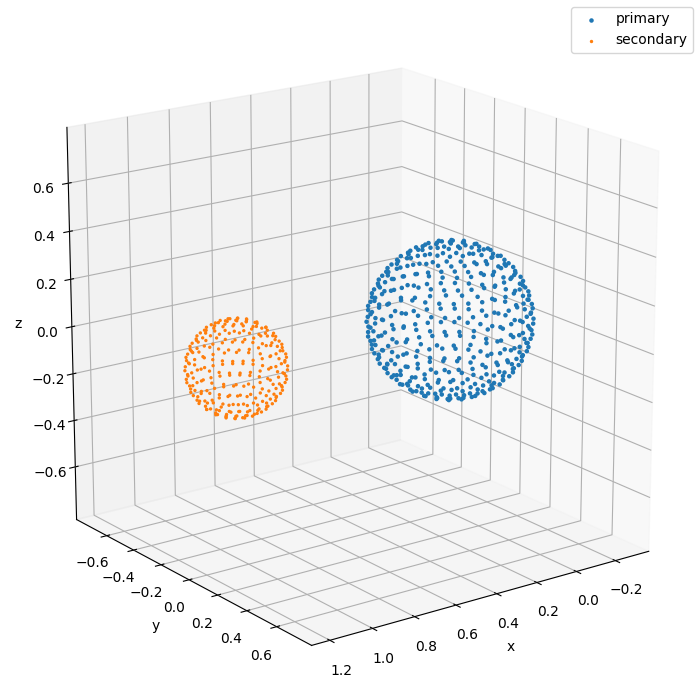

In [15]:
bs.plot.mesh(
    phase=phase, 
    azimuth=60*u.deg,  # view azimuth
    inclination = 80*u.deg,  # elevation of line of sight vector
)

Surface points were triangulated using Delaunay triangulation and the coresponding triangles (simplices) can be accessed in the form of N x 3 numpy array of indices, where N is number of surface faces and each triplet is pointing to the corresponding triangle vertices in points array.

In [16]:
orbital_position_container.secondary.faces

array([[  4,   3,  58],
       [ 16,  15,  75],
       [ 16,  15,  20],
       ...,
       [263, 264,   7],
       [250, 263, 264],
       [263,   7,   6]])

Faces can be also visualized in form of the wireframe model:

<IPython.core.display.Javascript object>


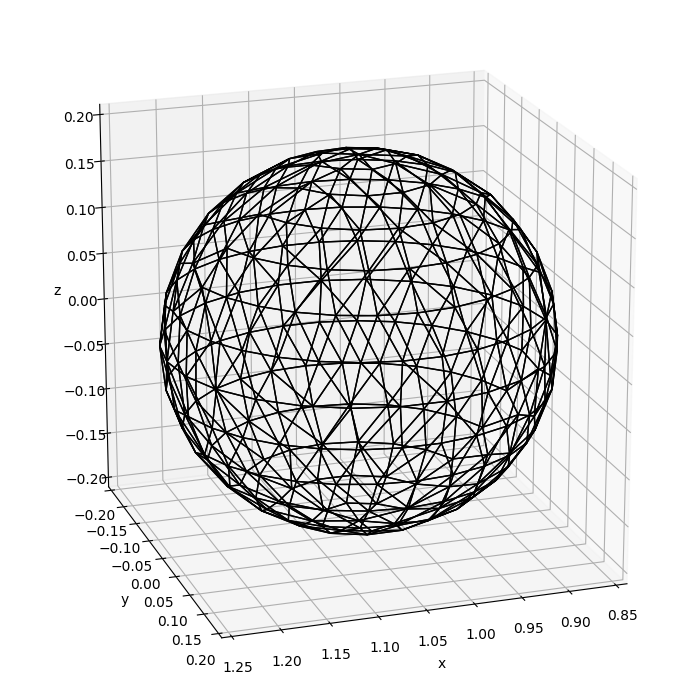

In [17]:
bs.plot.wireframe(
    phase=phase,
    components_to_plot='secondary', 
)

or similarly:

2021-04-07 10:04:19,349 - 6727 - observer.observer - INFO: initialising Observer instance


<IPython.core.display.Javascript object>


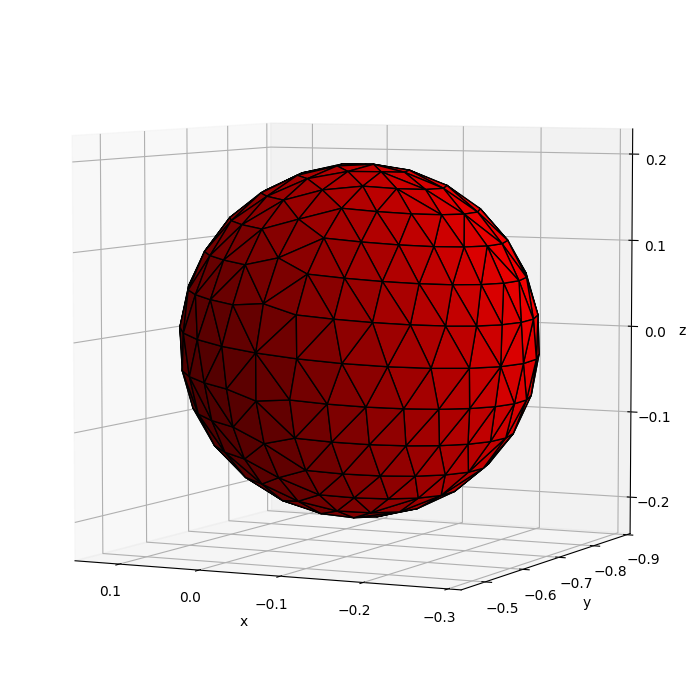

In [18]:
bs.plot.surface(
    phase=phase,
    components_to_plot='secondary',
    edges=True
)

Finally, the surface parameters such as gravitational acceleration or effective temperature for each surface element can be acessed:

In [19]:
# secondary.log_g  # (log(SI))
orbital_position_container.secondary.temperatures

array([7278.50074471, 7088.95574187, 7082.58128589, 7299.91918859,
       7284.39575237, 7300.2983508 , 7282.83055404, 7324.03047424,
       7341.03646137, 7287.73160842, 7274.54082593, 6908.38886751,
       7162.40143239, 7169.69523195, 7201.62493938, 7275.09986246,
       7245.43600358, 7238.23533027, 7226.20866395, 7193.0797921 ,
       7212.81844976, 7223.36503133, 7021.52513345, 7009.90868157,
       7010.20395882, 7013.59697312, 7002.5906838 , 7035.43328375,
       6997.15662107, 6993.22124358, 7021.4893839 , 7038.11551174,
       7039.50009141, 6982.10617174, 6970.55645894, 7104.08128456,
       7095.56357692, 7137.5574975 , 7148.68762055, 7126.09800389,
       7119.51253933, 7192.05979567, 7218.0458019 , 7244.40115593,
       7229.87571403, 7083.03186779, 7055.3356904 , 6906.15078153,
       6953.22845216, 6932.02322651, 6921.29551247, 7065.37284105,
       7074.60121689, 7054.00730716, 7070.63059406, 7067.73361341,
       7049.19776892, 7044.70913237, 7065.22757519, 7052.30468

Of course, we can visualize them in the surface plot:

2021-04-07 10:17:28,605 - 6727 - observer.observer - INFO: initialising Observer instance


<IPython.core.display.Javascript object>


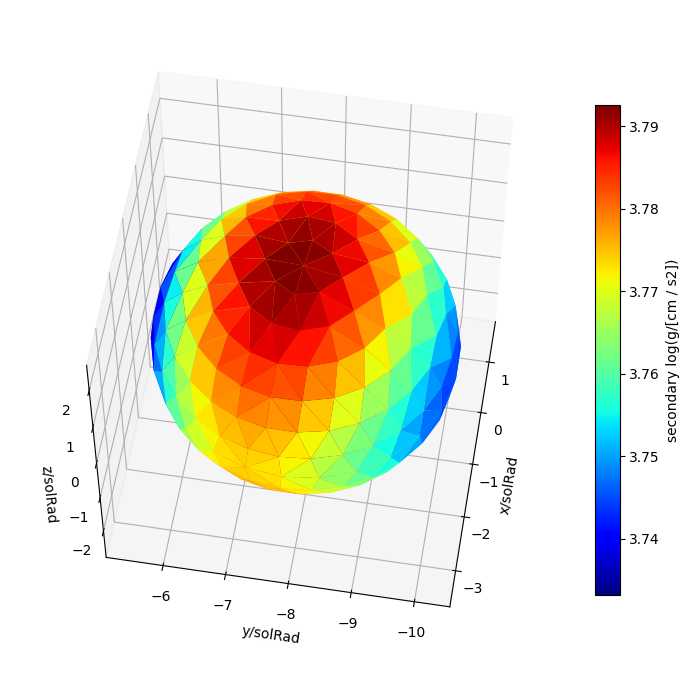

In [25]:
bs.plot.surface(
    phase=phase,
    colormap='gravity_acceleration',
    components_to_plot='secondary',
    unit=u.cm/u.s**2,
    scale='log',
#     normals=True,
    axis_unit=u.solRad,
)

Currently supported `colormap` arguments are: `gravity_acceleration`, `temperature`, `velocity`, `radial_velocity`, `radiance`, `normal_radiance` or None (default).